In [33]:
import numpy as np
import matplotlib.pyplot as plt
import gudhi as gd
# %matplotlib widget enables interactive plots in VS Code
%matplotlib widget


In [34]:
# from plyfile import PlyData, PlyElement

# data = PlyData.read('./datasets/dragon_vrip.ply')

In [35]:
# convert numpy array of vertex 3-tuples to a numpy array of shape (N, 3)
# data['vertex'].data[:1000]

# vertices = np.array([list(vertex) for vertex in data['vertex'].data])
# #save vertices on disk
# np.save('dragon_vrip_vertices.npy', vertices)
# vertices.shape
# vertices

In [36]:
# load vertices from disk
vertices = np.load('dragon_vrip_vertices.npy')

In [37]:
rng = np.random.default_rng()
sampled_500 = rng.choice(vertices, 500, replace=False)
sampled_1000 = rng.choice(vertices, 1000, replace=False)
sampled_1500 = rng.choice(vertices, 1500, replace=False)
sampled_2000 = rng.choice(vertices, 2000, replace=False)
sampled_2500 = rng.choice(vertices, 2500, replace=False)
sampled_3000 = rng.choice(vertices, 3000, replace=False)
sampled_3500 = rng.choice(vertices, 3500, replace=False)

In [38]:

# #sampled_500 = np.random.Generator.choice(vertices, 500, replace=False)
# # sampled_500 is a numpy array of 500 unique random indices sampled from the range of vertex indices in the vertices array.
# sampled_1000 = np.random.choice(vertices.shape[0], size=1000, replace=False)
# vertices_1000 = vertices[sampled_1000]
# sampled_1500 = np.random.choice(vertices.shape[0], size=1500, replace=False)
# sampled_2000 = np.random.choice(vertices.shape[0], size=2000, replace=False)
# sampled_2500 = np.random.choice(vertices.shape[0], size=2500, replace=False)
# sampled_3000 = np.random.choice(vertices.shape[0], size=3000, replace=False)
# sampled_3500 = np.random.choice(vertices.shape[0], size=3500, replace=False)

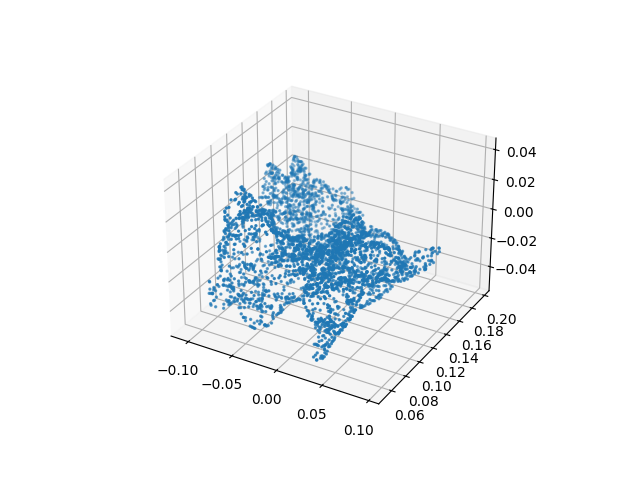

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sampled_3500[:, 0], sampled_3500[:, 1], sampled_3500[:, 2], s=2)
plt.show()

In [40]:
ac = gd.AlphaComplex(points = sampled_3500)
st = ac.create_simplex_tree()
points = np.array([ac.get_point(i) for i in range(st.num_vertices())])
triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 3 and s[1] <= 0.005])
#[*st.get_skeleton(2)]

In [41]:
# # Visualization with plotly

# import plotly
# from plotly.graph_objs import graph_objs as go
# import ipywidgets as widgets

# plotly.offline.init_notebook_mode()
# from plotly.offline import iplot

# alpha = widgets.FloatSlider(
#     value = 0.005,
#     min = 0.00015,
#     max = 0.1,
#     step = 0.00001,
#     description = 'Alpha:', 
#     readout_format = '.4f'
# )

# mesh = go.Mesh3d(
#     x = points[:, 0], 
#     y = points[:, 1], 
#     z = points[:, 2], 
#     # i = triangles[:, 0], 
#     # j = triangles[:, 1], 
#     # k = triangles[:, 2]
# )

# fig = go.FigureWidget(
#     data = mesh, 
#     layout = go.Layout(
#         title = dict(
#             text = 'Alpha Complex Representation of sampled_500'
#         ), 
#         scene = dict(
#             xaxis = dict(nticks = 4, range = [-0.1, 0.1]), 
#             yaxis = dict(nticks = 4, range = [0.06, 0.2]), 
#             zaxis = dict(nticks = 4, range = [-0.04, 0.04])
#         )
#     )
# )

# def view_sample(alpha):
#     triangless = np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 3 and s[1] <= alpha])
#     fig.data[0].i = triangless[:, 0]
#     fig.data[0].j = triangless[:, 1]
#     fig.data[0].k = triangless[:, 2]
#     iplot(fig)

# widgets.interact(view_sample, alpha = alpha);

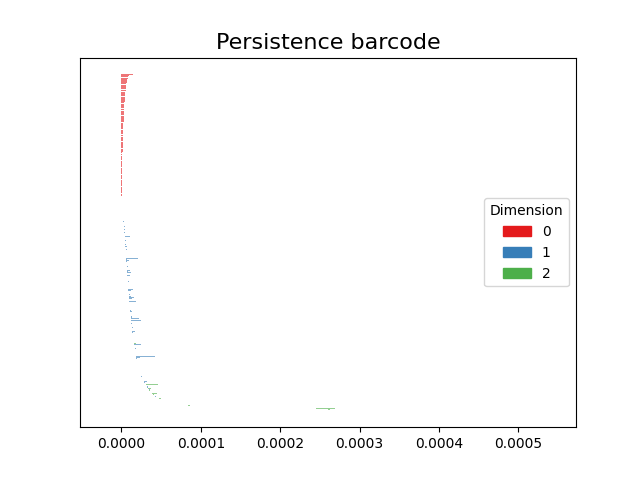

In [42]:
Bar_code = st.persistence()
fig = gd.plot_persistence_barcode(Bar_code, legend = True)


<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

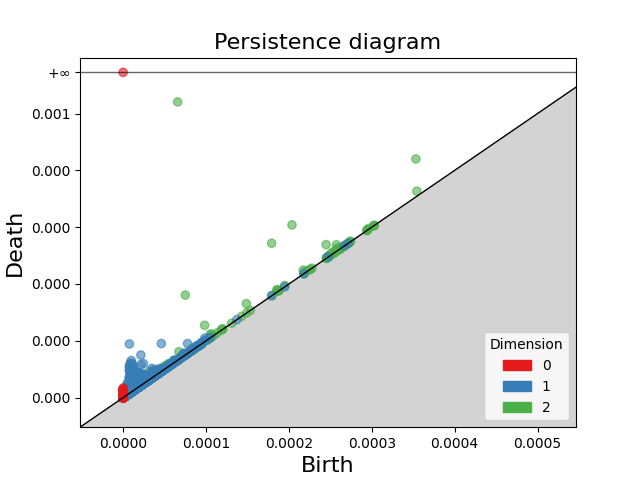

In [43]:
gd.plot_persistence_diagram(Bar_code, legend = True)

In [ ]:
skeleton = gd.RipsComplex(points = sampled_500, max_edge_length = 0.1, sparse = 0.02)
# The 'skeleton' variable is an instance of gudhi.rips_complex.RipsComplex.
# This object does not have a shape attribute like a numpy array.
# It is a class instance that stores the parameters and methods to construct a Rips complex.
# To see its attributes, you can use dir(skeleton) or skeleton.__dict__.
# #print(type(skeleton))
# print(dir(skeleton))
# #print(skeleton.__dict__)
Rst = skeleton.create_simplex_tree(max_dimension = 3)
Rips_bar_code = Rst.persistence()
gd.plot_persistence_barcode(Rips_bar_code, legend = True)

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

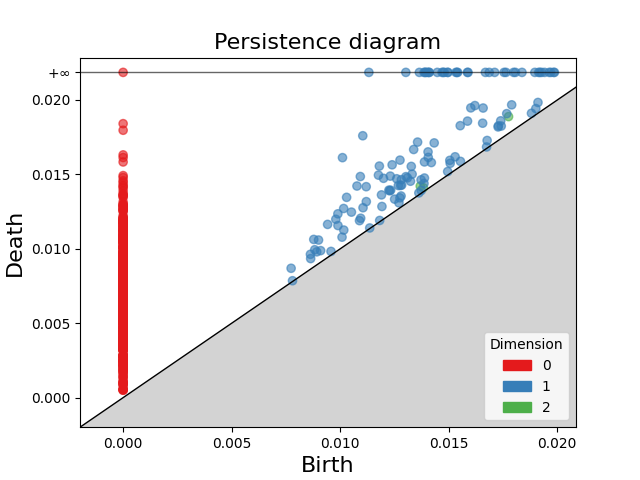

In [ ]:
gd.plot_persistence_diagram(Rips_bar_code, legend = True)

In [ ]:
# points = np.array([ac.get_point(i) for i in range(st.num_vertices())])
# triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 3 and s[1] <= 0.005])